### Heat Map for Glioma Bulk-seq Data
----

#### Rで描いたやつのデザインがしょぼいので作り直す

In [1]:
# Import Library

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./gene_vs_sample_MG.csv"
    , "genes": ["HK1", "HK2", "HK3", "GCK", "LDHA", "LDHAL6A", "LDHAL6B", "LDHB", "LDHC", "LDHD", "FBP1", "FBP2", "ARHGAP11B", "PPAT"]
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": .7}
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0)

In [4]:
# Shape Data
data = np.log2(rawdata+1).T.sort_index().T
data.index.name=None

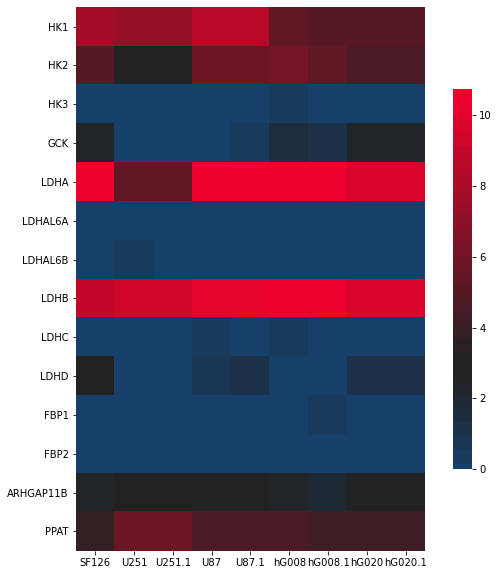

In [5]:
# TPM heatmap
hTPM = data.loc[CONFIG["genes"], :]
plt.figure(figsize=(10, 10))
sns.heatmap(hTPM, cmap=CONFIG["color"], square=True, robust=True, center=hTPM.mean().mean(), cbar=True, cbar_kws=CONFIG["cbar"])
plt.savefig("./HeatMap_TPM.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [6]:
# Calculating Z score
Zdata = data.loc[CONFIG["genes"], :].T.apply(zscore).T

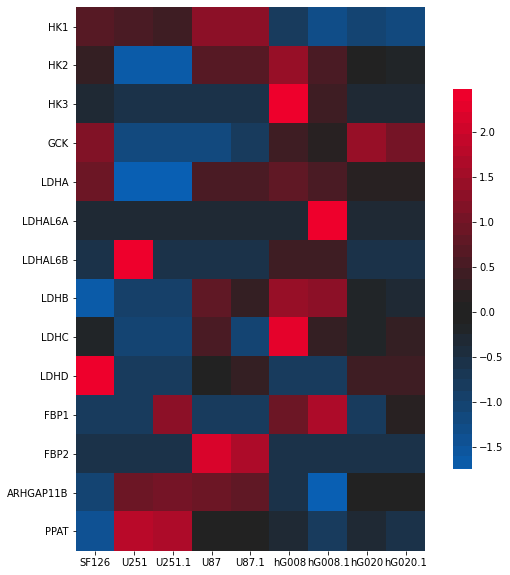

In [7]:
# Z score heat map
plt.figure(figsize=(10, 10))
sns.heatmap(Zdata, cmap=CONFIG["color"], square=True, robust=True, center=0, cbar=True, cbar_kws=CONFIG["cbar"])
plt.savefig("./HeatMap_Zscore.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)